# Loan Eligibility Prediction

Loan eligibility is defined as set of criteria bases which a financial institution evaluvate to decide the eligibity of the customer for a particular loan.

criteria:loan amount,dependent,martial status,applicant income,gender,property area,credit history

Data science-->is a field that deals with large voulme of data and uses various tools and algorithm to find unseen patterns and dervive meaningfull information    

machine Learning-->uses algorithm for the computer to learn from  the data and improve it accurancy by itself through exprience

Supervised Machine Learning-->machine is trained using labelled data,the algorithm learns from labelled training data and predict outcome from unseen data

Two types algorithm-->classification(categorical prediction),regression(continnous)
classification-->Descision tree,random forest ,navies bayes
regression-->simple linear,polynomial,multipl linear

Here we are using "Classification Algorithm"

Decision Tree Algorithm-->used both for Classification and Regression
It forms trees like structure:Internal node represent the attributes of the dataset
Branches represent outputs of the test
Each leaf node represent the class labels(final class).
It asks question and answer  as condition -->it yes or no

Steps:
-->pick best attribute from the dataset
-->ask relevent question
-->divide the dataset based on the answer
-->go to step1 and rescurvely and make new decision tree using the subset of dataset created


Attributes selection methods

-->entropy
-->information gain
-->gini index
--->gain ratio

Entropy-->is measures of randomness in the information being processed.


information gain-->how well the given attribute seperate the training  data according to the data get classification
Hence an attribute with low entropy and high information gain is prefered

Here we also try Navies Bayes Algorithm.

Its is simple ,as well as fast and accurate and reliable classification alogrithm.

Probabilistic Machine Learning Algorithm based on bayess Theorem.

Assumption made by Navie Bayes:each features makes and equal and independent contribution to the outcomes

Libraryies Used in this Projects:
    
Pandas-->data analysis,filtering,manipulation

Numpy-->used to perform mathematical and logical operation on array.

Matplotlib--->comprehensive library  for creating stastic,interactive,animated visualization

scikitlearn--> most useful with efficient tool for Machine Learning and statistical modeling including range of supervide and unsupervised alogithm

# importing lib

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
dataset=pd.read_csv("train.csv")


In [4]:
dataset


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.shape

(614, 13)

In [7]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [8]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
#chk how credict history affect loan status for each of the applicant
pd.crosstab(dataset["Credit_History"],dataset["Loan_Status"],margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


In [19]:
#here credict history of "1" have high eligibity than "0"

# Data exploration 

<Axes: >

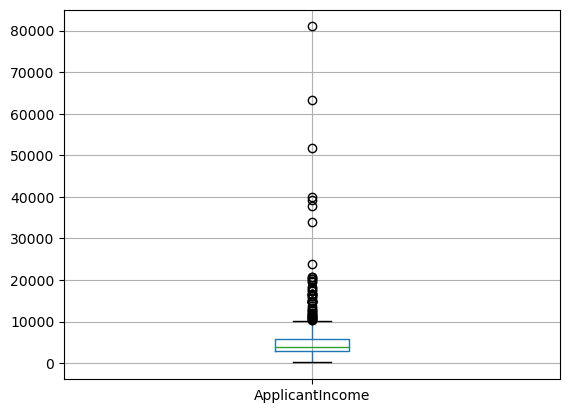

In [10]:
#for  ApplicantIncome variable
dataset.boxplot(column="ApplicantIncome")

<Axes: >

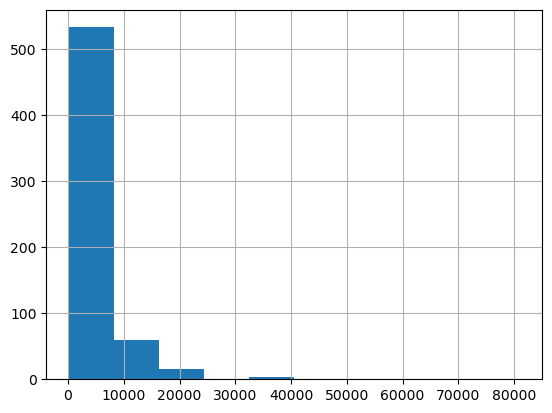

In [11]:
#it is visible there are many outliers,this need to be treated
#lets see histogram for same variables
dataset["ApplicantIncome"].hist(bins=10)

<Axes: >

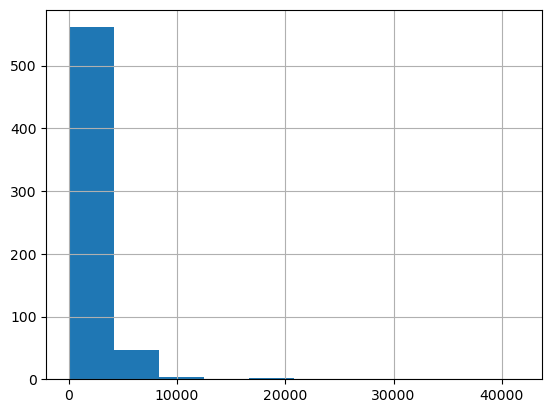

In [12]:
#lets see coapplicatnatant income thru histogram
dataset["CoapplicantIncome"].hist(bins=10)

In [23]:
#both applicant and coapplicant income is right skewed ,we need to normalize it

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

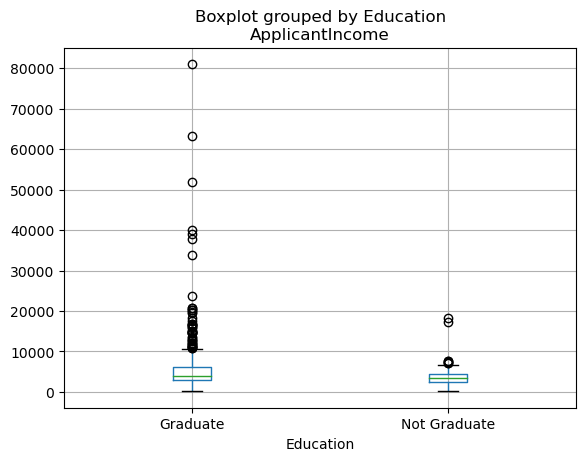

In [13]:
#lets chk the relationship between applicantincome and education thru boxplot
dataset.boxplot(column="ApplicantIncome",by="Education")

In [25]:
#it s clear that applicant who are graduate have high salary,we need to naormalise or scaling these values ia oneimportant step and implement for preprocessing

<Axes: >

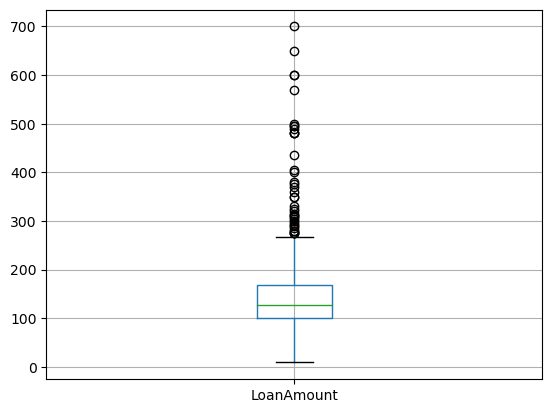

In [14]:
#let see "LoanAmount"
dataset.boxplot(column="LoanAmount")

<Axes: >

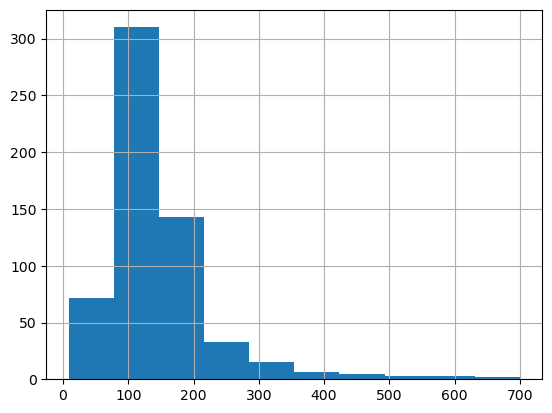

In [15]:
#here we see so many outliers in loanamount variables which needs to be handled
#lets draw histogram for LoanAmount variables
dataset["LoanAmount"].hist(bins=10)

<Axes: >

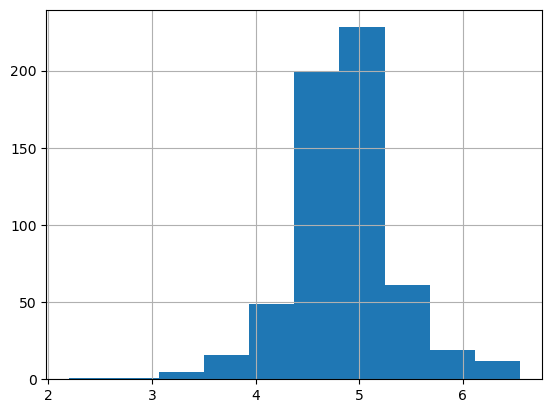

In [16]:
#its right skewed,let normalize using log function and visualize thru histogram(save loan amount in new vaiables)
dataset["LoanAmount_log"]=np.log(dataset["LoanAmount"])
dataset["LoanAmount_log"].hist(bins=10)


In [17]:
#find and fill the missing values
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_log       22
dtype: int64

In [18]:
#for gender its odject/categorical  type we fill with mode()
dataset["Gender"].fillna(dataset["Gender"].mode()[0],inplace=True)

In [19]:
#for Married its odject/categorical  type we fill with mode()
dataset["Married"].fillna(dataset["Married"].mode()[0],inplace=True)

In [20]:
#for Dependents its odject/categorical  type we fill with mode()
dataset["Dependents"].fillna(dataset["Dependents"].mode()[0],inplace=True)

In [21]:
#for Self_Employed its odject/categorical  type we fill with mode()
dataset["Self_Employed"].fillna(dataset["Self_Employed"].mode()[0],inplace=True)

In [22]:
#for LoanAmount  its numeric  type we fill with mean()
dataset.LoanAmount=dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
#lets apply this for LoanAmount_Log as well
dataset.LoanAmount_log=dataset.LoanAmount_log.fillna(dataset.LoanAmount_log.mean())

In [23]:
dataset["Loan_Amount_Term"].dtype

dtype('float64')

In [24]:
#Loan_Amount_Term has few categorical type so let go with mode()
dataset["Loan_Amount_Term"].fillna(dataset["Loan_Amount_Term"].mode()[0],inplace=True)

In [25]:
dataset["Credit_History"].dtype

dtype('float64')

In [26]:
dataset["Credit_History"].fillna(dataset["Credit_History"].mode()[0],inplace=True)

In [27]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_log       0
dtype: int64

In [28]:
#as we see before Applicant income and coapplicant income are right skewed ,lets normalised it now
#here instead of doing separatelty we find sum of applicant income and coapplicant income and then find log
dataset["Total_income"]=dataset["ApplicantIncome"]+dataset["CoapplicantIncome"]
dataset["Total_income_log"]=np.log(dataset["Total_income"])

<Axes: >

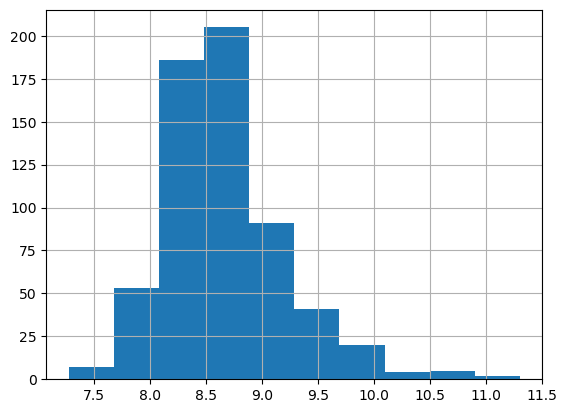

In [29]:
dataset["Total_income_log"].hist(bins=10)

In [30]:
dataset.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_log,Total_income,Total_income_log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,4.857444,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,4.852030,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,4.189655,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,4.787492,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,4.948760,6000.0,8.699515


In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
 13  LoanAmount_log     614 non-null    float64
 14  Total_income       614 non-null    float64
 15  Total_income_log   614 non-null    float64
dtypes: float64(7), int64(1), o

In [32]:
#lets separate dependent and independent variables
X=dataset.iloc[:,np.r_[1:5,9:11,13:15]].values
Y=dataset.iloc[:,12].values

In [33]:
X

array([['Male', 'No', '0', ..., 1.0, 4.857444178729352, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 4.852030263919617, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 4.189654742026425, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 5.53338948872752, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 5.231108616854587, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 4.890349128221754, 4583.0]],
      dtype=object)

In [34]:
Y

array(['Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y',
       'Y', 'Y', 'N', 'Y', 'N', 'N', 'N', 'Y', 'N', 'Y', 'N', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y',
       'N', 'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'N',
       'N', 'N', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N', 'N',
       'N', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y',
       'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'Y', 'Y',
       'Y', 'N', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'N', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'N', 'N', 'Y', 'Y',
       'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'N', 'Y', 'Y', 'Y', 'N', 'Y', 'N',
       'Y', 'Y', 'Y', 'N', 'Y', 'N', 'Y', 'Y', 'N', 'Y', 'N', 'N

# Spliting into train and test dataset

In [35]:
# split the dataset into train and test
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)
#random state is 0 to get same accurancy every cycle

In [36]:
#lets chk our data X
print(X_train)

[['Male' 'Yes' '0' ... 1.0 4.875197323201151 5858.0]
 ['Male' 'No' '1' ... 1.0 5.278114659230517 11250.0]
 ['Male' 'Yes' '0' ... 0.0 5.003946305945459 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 5.298317366548036 8334.0]
 ['Male' 'Yes' '0' ... 1.0 5.075173815233827 6033.0]
 ['Female' 'Yes' '0' ... 1.0 5.204006687076795 6486.0]]


In [ ]:
#we see many categorical variable Male->gender,Yes
#we need to change to numeric using label encoder

# Preprocessing

In [37]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X=LabelEncoder()

In [38]:
for i in range(0,5):
    X_train[:,i]=labelencoder_X.fit_transform(X_train[:,i])

In [39]:
X_train[:,7]=labelencoder_X.fit_transform(X_train[:,7])

In [40]:
X_train

array([[1, 1, 0, ..., 1.0, 4.875197323201151, 267],
       [1, 0, 1, ..., 1.0, 5.278114659230517, 407],
       [1, 1, 0, ..., 0.0, 5.003946305945459, 249],
       ...,
       [1, 1, 3, ..., 1.0, 5.298317366548036, 363],
       [1, 1, 0, ..., 1.0, 5.075173815233827, 273],
       [0, 1, 0, ..., 1.0, 5.204006687076795, 301]], dtype=object)

In [41]:
#lets apply the same procedure in Y_train
labelencoder_Y=LabelEncoder()
Y_train=labelencoder_Y.fit_transform(Y_train)

In [42]:
Y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [43]:
#lets do the same test set
for i in range(0,5):
    X_test[:,i]=labelencoder_X.fit_transform(X_test[:,i])


In [44]:
X_test[:,7]=labelencoder_X.fit_transform(X_test[:,7])

In [45]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 4.430816798843313, 85],
       [0, 0, 0, 0, 5, 1.0, 4.718498871295094, 28],
       [1, 1, 0, 0, 5, 1.0, 5.780743515792329, 104],
       [1, 1, 0, 0, 5, 1.0, 4.700480365792417, 80],
       [1, 1, 2, 0, 5, 1.0, 4.574710978503383, 22],
       [1, 1, 0, 1, 3, 0.0, 5.10594547390058, 70],
       [1, 1, 3, 0, 3, 1.0, 5.056245805348308, 77],
       [1, 0, 0, 0, 5, 1.0, 6.003887067106539, 114],
       [1, 0, 0, 0, 5, 0.0, 4.820281565605037, 53],
       [1, 1, 0, 0, 5, 1.0, 4.852030263919617, 55],
       [0, 0, 0, 0, 5, 1.0, 4.430816798843313, 4],
       [1, 1, 1, 0, 5, 1.0, 4.553876891600541, 2],
       [0, 0, 0, 0, 5, 1.0, 5.634789603169249, 96],
       [1, 1, 2, 0, 5, 1.0, 5.4638318050256105, 97],
       [1, 1, 0, 0, 5, 1.0, 4.564348191467836, 117],
       [1, 1, 1, 0, 5, 1.0, 4.204692619390966, 22],
       [1, 0, 1, 1, 5, 1.0, 5.247024072160486, 32],
       [1, 0, 0, 1, 5, 1.0, 4.882801922586371, 25],
       [0, 0, 0, 0, 5, 1.0, 4.532599493153256, 1],
       [1, 1

In [46]:
Y_test=labelencoder_Y.fit_transform(Y_test)

In [47]:
Y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

# Scaling the  Dataset

In [48]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.fit_transform(X_test)

In [97]:
#we have done handing missing values,outliers,preprocessing and sacling
#let start with applying algorithm,here first we use DecisionTree

# Decision Tress Algorithm

In [49]:
from sklearn.tree import DecisionTreeClassifier
DTClassifiers=DecisionTreeClassifier(criterion="entropy",random_state=0)
DTClassifiers.fit(X_train,Y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [50]:
y_pred=DTClassifiers.predict(X_test)

In [51]:
y_pred

array([0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1])

In [52]:
#let see the accurancy
from sklearn import metrics
print("The accurancy of Decision Tress:",metrics.accuracy_score(y_pred,Y_test))

The accurancy of Decision Tress: 0.7073170731707317


In [103]:
#it shows 70% accurancy,generally it not that good,no lets try with naive bayes algorithm

# Navie Bayes Algorithm

In [53]:
from sklearn.naive_bayes import GaussianNB
NBClassifier=GaussianNB()
NBClassifier.fit(X_train,Y_train)

GaussianNB()

In [54]:
y_pred_NB=NBClassifier.predict(X_test)

In [55]:
y_pred_NB

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

In [56]:
print("The acurrancy using Navie Bayes Algorith :",metrics.accuracy_score(y_pred_NB,Y_test))

The acurrancy using Navie Bayes Algorith : 0.8292682926829268


here accurancy with NaviesBayes algorithm is better,which is app 83%

now we are going to import our test dataset,and in that test dataset ,we do not have the labels,where we dont know whter the person is eligible for loan or not.In navie bayes algorithm  we are going to predict that outcome

# Import Test Data(unlabelled data)

In [57]:
#import the testdata
testdata=pd.read_csv("test.csv")

# Data exploration

In [58]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [59]:
testdata.shape

(367, 12)

In [60]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [112]:
#it looks many missing data

In [61]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [62]:
#lets handle missing variable(mode for catgorical,mean for numeric)
testdata["Gender"].fillna(testdata["Gender"].mode()[0],inplace=True)

In [63]:
testdata["Dependents"].fillna(testdata["Dependents"].mode()[0],inplace=True)

In [64]:
testdata["Self_Employed"].fillna(testdata["Self_Employed"].mode()[0],inplace=True)

In [65]:
testdata["Loan_Amount_Term"].fillna(testdata["Loan_Amount_Term"].mode()[0],inplace=True)
testdata["Credit_History"].fillna(testdata["Credit_History"].mode()[0],inplace=True)

In [66]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

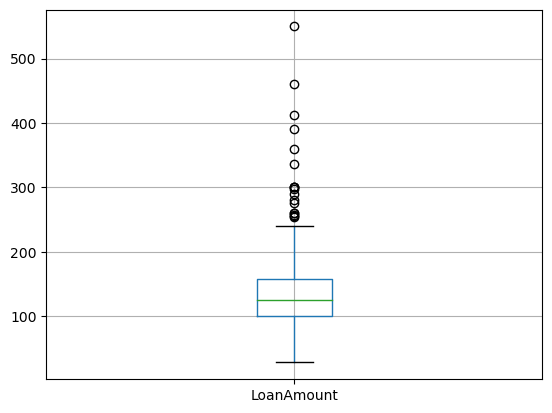

In [67]:
#only LoanAmount has missing value ,before that lets see whethere LoanAMount has outlier using boxplot
testdata.boxplot(column="LoanAmount")

<Axes: >

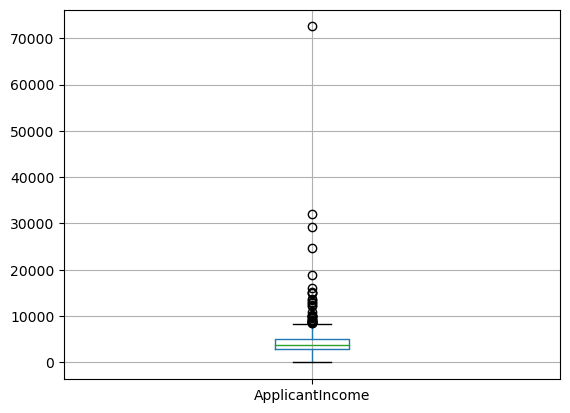

In [68]:
#lets chk for applicantincome
testdata.boxplot(column="ApplicantIncome")

In [69]:
#both has outlier,before that we need to handle missing values
#for LoanAmount
testdata.LoanAmount=testdata.LoanAmount.fillna(testdata.LoanAmount.mean())


In [70]:
#we need to normalize LoanAmount using Log
testdata["LoanAmount_Log"]=np.log(testdata["LoanAmount"])

In [71]:
#Again cj=hk for missing data
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
LoanAmount_Log       0
dtype: int64

In [72]:
#as we did earlier in train data let sum Applicatanincome and coapplicant income and find Log
testdata["TotalIncome"]=testdata["ApplicantIncome"]+testdata["CoapplicantIncome"]
testdata["TotalIncome_Log"]=np.log(testdata["TotalIncome"])

In [73]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,LoanAmount_Log,TotalIncome,TotalIncome_Log
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban,4.700480,5720,8.651724
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban,4.836282,4576,8.428581
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban,5.337538,6800,8.824678
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,1.0,Urban,4.605170,4886,8.494129
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban,4.356709,3276,8.094378


In [74]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
 12  LoanAmount_Log     367 non-null    float64
 13  TotalIncome        367 non-null    int64  
 14  TotalIncome_Log    367 non-null    float64
dtypes: float64(5), int64(3), object(7)
memory usage: 43.1+ KB


In [75]:
#now we put only required varibles in test
test=testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [76]:
test

array([['Male', 'Yes', '0', ..., 1.0, 5720, 8.651724084373843],
       ['Male', 'Yes', '1', ..., 1.0, 4576, 8.428580533059634],
       ['Male', 'Yes', '2', ..., 1.0, 6800, 8.824677891164198],
       ...,
       ['Male', 'No', '0', ..., 1.0, 5243, 8.564649132572534],
       ['Male', 'Yes', '0', ..., 1.0, 7393, 8.9082888855571],
       ['Male', 'No', '0', ..., 1.0, 9200, 9.126958763037132]],
      dtype=object)

In [ ]:
#converting categorical to numerical format

In [77]:
for i in range(0,5):
    test[:,i]=labelencoder_X.fit_transform(test[:,i])

In [79]:
test[:,7]=labelencoder_X.fit_transform(test[:,7])

In [80]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [82]:
#all our datas are converted into numeric form ,now lets scale our data
#note the instance like ss,labelencoder_x has been created while traing dataset


In [81]:
test=ss.fit_transform(test)

In [83]:
#we are going to predict using navie bayes
pred_navies_bayes_test=NBClassifier.predict(test)

In [84]:
pred_navies_bayes_test

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [ ]:
# 1-->eligible,0-->not eligible